<a href="https://colab.research.google.com/github/jferreiraz/Swarm/blob/main/Swarm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

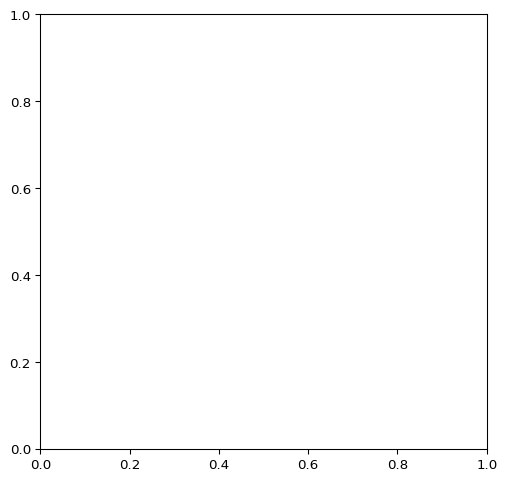

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import imageio
import traceback
import shutil

v0           = 1      # velocity
eta          = 0.3      # random fluctuation in angle (in radians)
L            = 50        # size of box
R            = 0.5      # interaction radius
dt           = 0.1      # time step
Nt           = 30       # number of time steps
N            = 330      # number of birds
plotRealTime = True

np.random.seed(30)      # set the random number generator seed

x = np.random.rand(N,1)*L
y = np.random.rand(N,1)*L
theta = 2 * np.pi * np.random.rand(N,1)
vx = v0 * np.cos(theta)
vy = v0 * np.sin(theta)

fig = plt.figure(figsize=(6,6), dpi=96)
ax = plt.gca()

temp_path = os.path.join(os.getcwd(), 'temp')
os.mkdir(temp_path)

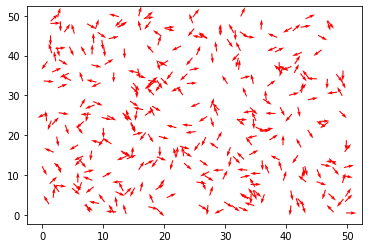

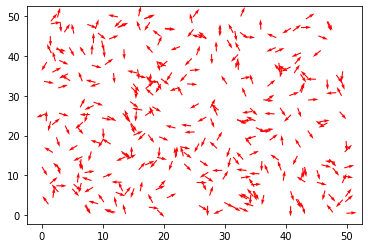

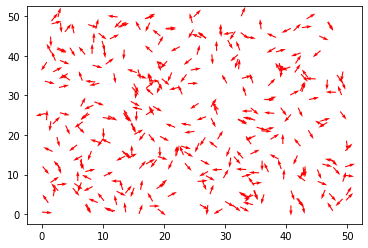

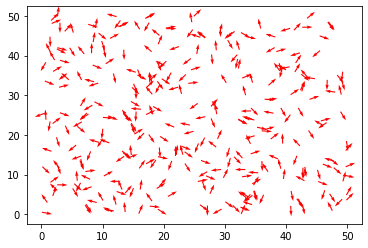

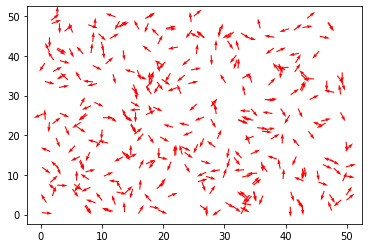

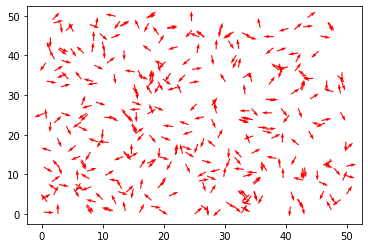

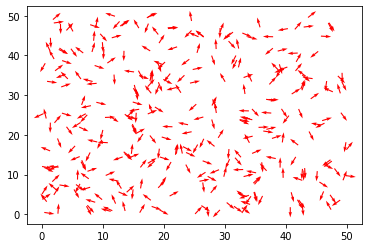

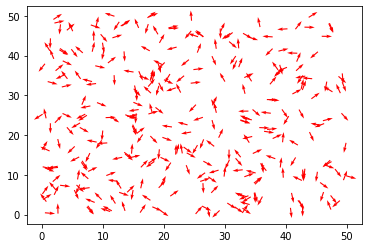

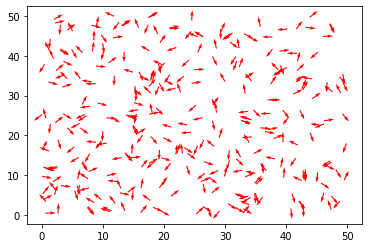

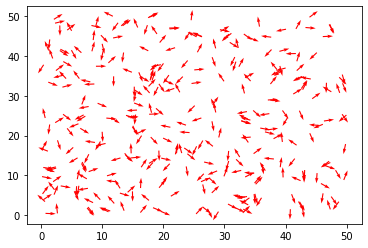

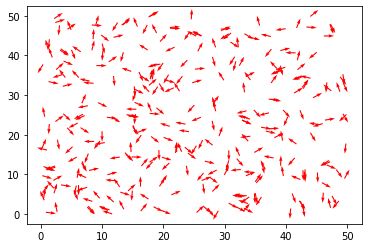

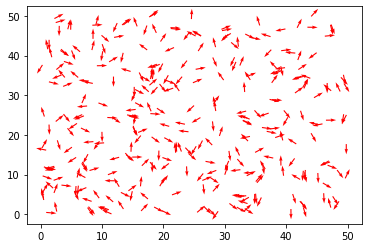

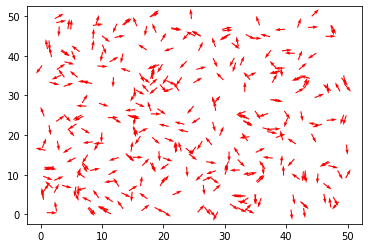

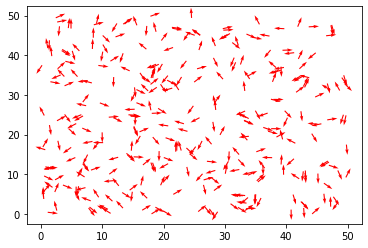

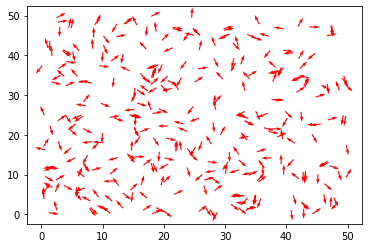

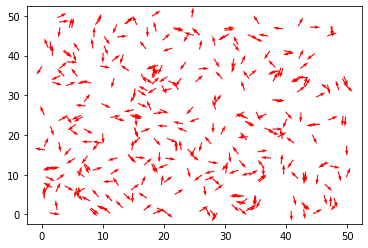

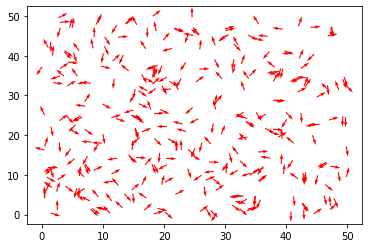

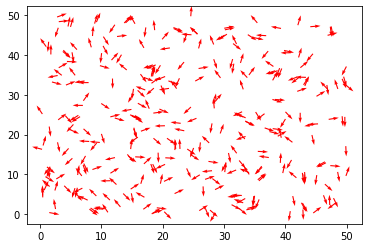

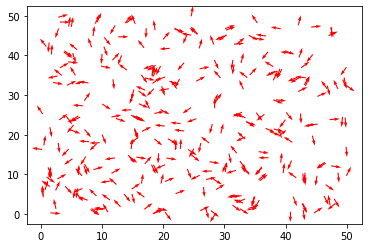

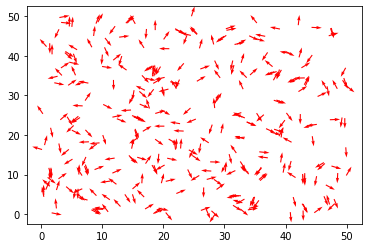

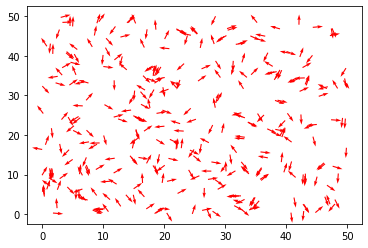

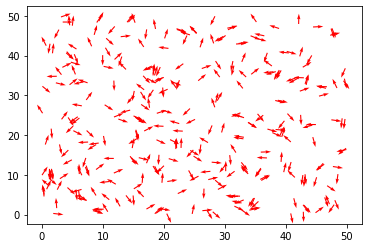

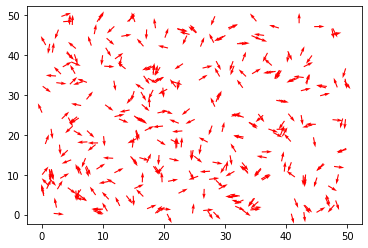

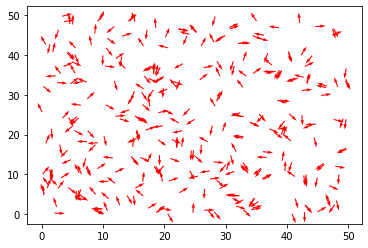

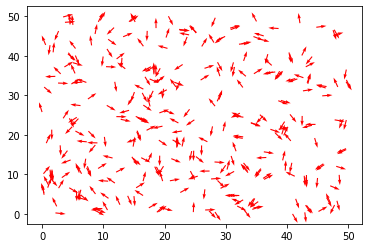

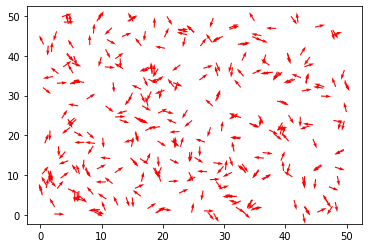

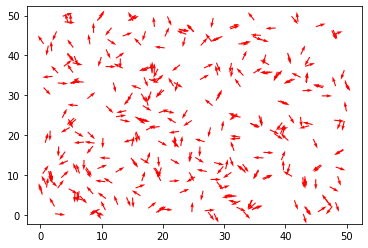

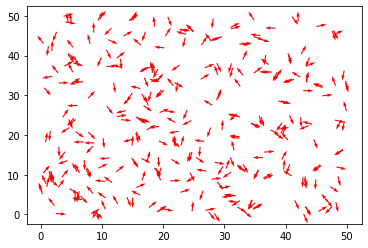

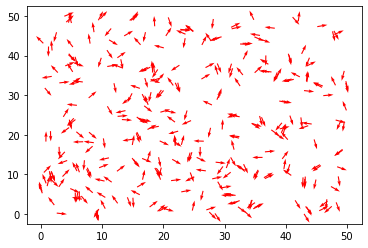

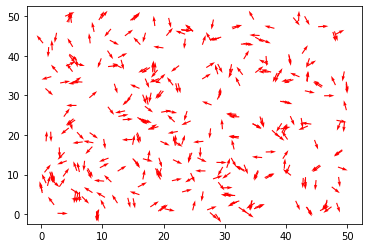

In [ ]:
for i in range(Nt):
    # move
    x += vx*dt
    y += vy*dt
    
    # apply periodic BCs
    x = x % L
    y = y % L
    
    # find mean angle of neighbors within R
    mean_theta = theta
    for b in range(N):
        neighbors = (x-x[b])**2+(y-y[b])**2 < R**2
        sx = np.sum(np.cos(theta[neighbors]))
        sy = np.sum(np.sin(theta[neighbors]))
        mean_theta[b] = np.arctan2(sy, sx)
        
    # add random perturbations
    theta = mean_theta + eta*(np.random.rand(N,1)-0.5)
    
    # update velocities
    vx = v0 * np.cos(theta)
    vy = v0 * np.sin(theta)
    
    # plot in real time
    if plotRealTime or (i == Nt-1):
        plt.cla()
        plt.quiver(x,y,vx,vy,color='r')
        ax.set(xlim=(0, L), ylim=(0, L))
        ax.set_aspect('equal')
        temp_fig_path = os.path.join(temp_path, f'activematter_{i:03d}.png')
        plt.savefig(temp_fig_path, dpi=240)
        plt.pause(0.001)
        plt.show()

In [ ]:
try:
    dest_gif = os.path.join(os.getcwd(), "sma_event_experiment.gif")
    with imageio.get_writer(dest_gif, mode='I') as writer:
        for filename in next(os.walk(temp_path), (None, None, []))[2]:
            filename_path = os.path.join(temp_path, filename)
            image = imageio.imread(filename_path)
            writer.append_data(image)
    print(f"The GIF file has been generated successfully at '{dest_gif}'!")
except Exception:
    print(f"An error occurred while processing the GIF file:\n{traceback.format_exc()}")

The GIF file has been generated successfully at '/content/sma_event_experiment.gif'!


In [ ]:
shutil.rmtree(temp_path)

In [ ]:
os.remove("sma_event_experiment.gif")

In [ ]:
shutil.rmtree(temp_path)
os.remove("sma_event_experiment.gif")